In [ ]:
%tensorflow_version 2.x

In [ ]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2020-11-05 07:48:01--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2020-11-05 07:48:01--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc02a1b809c35310a84ad05c2e96.dl.dropboxusercontent.com/cd/0/inline/BCnpfnOlW-dZnYMk9v_az62BNvtyHP0VLXsfVknFs2__umxNw4f7ZKXpRMTQzD05pKJI-DXde09Qfb8iQrt4mZRYOcWjeTFNm1et1LZXLG-7eQ/file# [following]
--2020-11-05 07:48:01--  https://uc02a1b809c35310a84ad05c2e96.dl.dropboxusercontent.com/cd/0/inline/BCnpfnOlW-dZnYMk9v_az62BNvtyHP0VLXsfVknFs2__u

In [ ]:
!unzip '/content/state-farm-distracted-driver-detection.zip'

Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [ ]:
!unzip '/content/imgs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  
  inflating: train/c7/img_57733.jpg  

In [ ]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [ ]:
#test images
len(os.listdir('test'))
#train images
print(len(os.listdir('/content/train/c0')))
print(len(os.listdir('/content/train/c1')))
print(len(os.listdir('/content/train/c2')))
print(len(os.listdir('/content/train/c3')))
print(len(os.listdir('/content/train/c4')))
print(len(os.listdir('/content/train/c5')))
print(len(os.listdir('/content/train/c6')))
print(len(os.listdir('/content/train/c7')))
print(len(os.listdir('/content/train/c8')))
print(len(os.listdir('/content/train/c9')))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


No. of train images = 22,424
No. of test images = 79,726

In [ ]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation="relu"))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Test directory
%mkdir Test

In [ ]:
#moving the test images to Test directory
!mv /content/test/  /content/Test

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

validation_generator = train_datagen.flow_from_directory(
        '/content/train',
         target_size=(64, 64),
         batch_size=32,
        class_mode='categorical',
         subset='validation'
        )


test_generator = test_datagen.flow_from_directory(
    '/content/Test',
        target_size=(64, 64),
        batch_size=32,
        shuffle=False,
        class_mode='categorical'
    
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [ ]:
type(test_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [ ]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [ ]:
model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 120s 215ms/step - loss: 2.3744 - accuracy: 0.1366 - val_loss: 2.2980 - val_accuracy: 0.2297
Epoch 2/10
560/560 [==============================] - 120s 214ms/step - loss: 2.0789 - accuracy: 0.2673 - val_loss: 2.0220 - val_accuracy: 0.2087
Epoch 3/10
560/560 [==============================] - 120s 214ms/step - loss: 1.9705 - accuracy: 0.2844 - val_loss: 1.9191 - val_accuracy: 0.2821
Epoch 4/10
560/560 [==============================] - 120s 214ms/step - loss: 1.8005 - accuracy: 0.3578 - val_loss: 1.7318 - val_accuracy: 0.3288
Epoch 5/10
560/560 [==============================] - 120s 215ms/step - loss: 2.1458 - accuracy: 0.2096 - val_loss: 2.0230 - val_accuracy: 0.2701
Epoch 6/10
560/560 [==============================] - 120s 214ms/step - loss: 1.9697 - accuracy: 0.3038 - val_loss: 2.1422 - val_accuracy: 0.1513
Epoch 7/10
560/560 [==============================] - 120s 214ms/step - loss: 2.0931 - accuracy: 0.2378 - val_loss: 1.8945 -

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [ ]:
mod = Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(units = 512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))
mod.add(Dense(units = 128,activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(10,activation='softmax'))

In [ ]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [ ]:
model2=mod.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 122s 218ms/step - loss: 2.0273 - accuracy: 0.3239 - val_loss: 1.5864 - val_accuracy: 0.4382
Epoch 2/10
560/560 [==============================] - 121s 216ms/step - loss: 1.1492 - accuracy: 0.5889 - val_loss: 0.6385 - val_accuracy: 0.7922
Epoch 3/10
560/560 [==============================] - 120s 214ms/step - loss: 0.8118 - accuracy: 0.7198 - val_loss: 0.5930 - val_accuracy: 0.7975
Epoch 4/10
560/560 [==============================] - 122s 218ms/step - loss: 0.6246 - accuracy: 0.7896 - val_loss: 0.3140 - val_accuracy: 0.8940
Epoch 5/10
560/560 [==============================] - 125s 222ms/step - loss: 0.5159 - accuracy: 0.8263 - val_loss: 0.3120 - val_accuracy: 0.9065
Epoch 6/10
560/560 [==============================] - 126s 225ms/step - loss: 0.4510 - accuracy: 0.8512 - val_loss: 0.1853 - val_accuracy: 0.9440
Epoch 7/10
560/560 [==============================] - 126s 226ms/step - loss: 0.3886 - accuracy: 0.8732 - val_loss: 0.4781 -

In [ ]:
%matplotlib inline  
import matplotlib.pyplot as plt

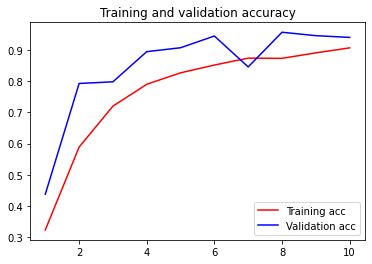

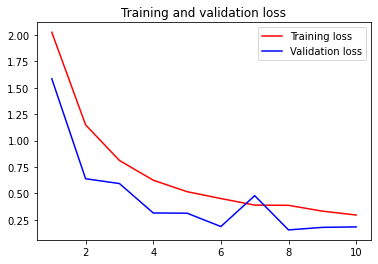

In [ ]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting train and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=mod.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
2491/2491 [==============================] - 364s 146ms/step


In [ ]:
pred

array([[1.36689664e-08, 1.10916731e-09, 4.54803654e-07, ...,
        4.02174351e-07, 5.39610028e-06, 3.41704945e-05],
       [1.02508835e-07, 2.68822437e-10, 9.50531742e-09, ...,
        1.62030206e-04, 5.33391187e-07, 1.10547580e-06],
       [7.63019954e-04, 9.98117566e-01, 5.10908649e-06, ...,
        2.29339319e-04, 7.98218243e-05, 3.48352623e-04],
       ...,
       [1.73096691e-06, 1.50562194e-08, 5.75576269e-05, ...,
        6.61305094e-05, 9.66263294e-01, 9.86260511e-06],
       [2.80739478e-04, 2.27791489e-07, 9.54228308e-05, ...,
        1.52651264e-04, 7.05125369e-03, 6.68549837e-05],
       [2.80392328e-07, 3.64104800e-08, 4.11685308e-09, ...,
        5.77753553e-07, 9.86252326e-06, 3.27404967e-04]], dtype=float32)

In [ ]:
labels_test_predictions = pd.DataFrame(pred)
labels_test_predictions

,0,1,2,3,4,5,6,7,8,9
0,1.366897e-08,1.109167e-09,4.548037e-07,1.473261e-09,3.101721e-08,9.999592e-01,3.309452e-07,4.021744e-07,5.396100e-06,0.000034
1,1.025088e-07,2.688224e-10,9.505317e-09,3.056299e-06,6.108398e-06,9.998266e-01,3.896465e-07,1.620302e-04,5.333912e-07,0.000001
2,7.630200e-04,9.981176e-01,5.109086e-06,1.142426e-04,1.777529e-04,8.272162e-08,1.646409e-04,2.293393e-04,7.982182e-05,0.000348
3,1.487558e-03,7.718094e-02,1.643552e-03,1.287477e-03,4.542717e-02,1.751690e-02,1.034868e-01,1.928504e-03,4.527640e-01,0.297277
4,6.070615e-04,1.349950e-07,2.641609e-05,9.150484e-01,8.204952e-02,1.729931e-03,5.946799e-06,1.244827e-05,5.035569e-04,0.000017
...,...,...,...,...,...,...,...,...,...,...
79707,6.775386e-05,1.262234e-03,1.313610e-07,4.099573e-06,1.761405e-04,6.103676e-04,5.074720e-06,7.241238e-01,1.737944e-04,0.273577
79708,1.201311e-04,1.681475e-05,9.607581e-05,1.911539e-03,8.220754e-02,1.923901e-01,2.070828e-02,6.647741e-01,3.236601e-02,0.005409
79709,1.730967e-06,1.505622e-08,5.755763e-05,2.701323e-08,2.227263e-03,1.131189e-06,3.137290e-02,6.613051e-05,9.662633e-01,0.000010
79710,2.807395e-04,2.277915e-07,9.542283e-05,5.399319e-03,9.778126e-01,8.313115e-04,8.309422e-03,1.526513e-04,7.051254e-03,0.000067


In [32]:
labels_test_predictions.to_csv('Distracted_Driver_MultiAction_Classification.csv',index=False)

In [33]:
from google.colab import files
files.download("Distracted_Driver_MultiAction_Classification.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>